In [1]:
import numpy as np
import pandas as pd 
import os
import sys
import random
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from mne.io import concatenate_raws, read_raw_edf
import antropy as ant
import mne
import mne_features
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
import warnings

## Looping through the files using Multithreading

In [2]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

def func_feature_extr(method):

    def feature_extr(subject):
        warnings.filterwarnings("ignore", category=FutureWarning)
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"
        path_eeg = f"{os_path}{subject}/eeg/{subject}_task-eyesclosed_eeg.set"
        print(f"{subject} started")
        #sys.stdout.flush()

        # import EEG file
        EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)
        low_freq, high_freq = 1.0, 40.0 # values in Hz
        raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4, verbose='ERROR')

        std_montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(std_montage)

        xRaw = raw.get_data()

        df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi


        channel_no=0
        for row in xRaw: #row === channel_no.
            hig_channel_series = []
        
            for i in range(500,len(xRaw[0]),250):
                    if(method == 'higuchi'):
                        hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
                    elif(method == 'katz'):
                        hig_channel_series.append(ant.katz_fd(row[i-500:i]))
                    elif(method == 'petrosian'):
                        hig_channel_series.append(ant.petrosian_fd(row[i-500:i]))
                    elif(method == 'spec_ent'):
                        hig_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=500, method='welch', normalize=True))
                    elif(method == 'perm_ent'):
                        hig_channel_series.append(ant.permutation_entropy(row[i-500:i], normalize=True))
                    elif(method == 'svd_ent'):
                        hig_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
                    elif(method == 'app_ent'):
                        hig_channel_series.append(ant.app_entropy(row[i-500:i]))
                    elif(method == 'samp_ent'):
                        hig_channel_series.append(ant.sample_entropy(row[i-500:i]))
                    elif(method == 'hjorth'):
                        hig_channel_series.append(ant.hjorth_params(row[i-500:i]))
                    elif(method == 'num_zerocross'):
                        hig_channel_series.append(ant.num_zerocross(row[i-500:i]))
                    elif(method == 'lziv'):
                        hig_channel_series.append(ant.lziv_complexity(row[i-500:i]))
                    else:
                        hig_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))
                    


            df_higuchi.iloc[:,channel_no] = hig_channel_series
            channel_no += 1

        # Adding subject number to the dataframe
        subject_num = int(subject.split('-')[1])

        df_higuchi['subject'] = subject_num
        
        return df_higuchi

    # Get the list of file paths
    os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"

    filenames_list = os.listdir(f"{os_path}")

    # Initialize an empty DataFrame for the final result
    final_df = pd.DataFrame()

    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor() as executor:
        processed_dfs = list(executor.map(feature_extr, filenames_list))

    # Concatenate all the processed DataFrames into the final DataFrame
    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df



In [3]:
list_methods = ['higuchi', 'katz', 'petrosian', 'spec_ent', 'perm_ent', 'svd_ent', 'app_ent', 'samp_ent', 'hjorth', 'num_zerocross', 'lziv', 'det_fluc']

In [4]:
# Higuchi Final Table
df_higuchi_final = func_feature_extr('higuchi')
print("Higuchi Done\n")

# Petrosian Final Table
df_petrosian_final = func_feature_extr('petrosian')
print("Petrosian Done\n")

# SVD Entropy Final Table
df_svd_ent_final = func_feature_extr('svd_ent')
print("SVD Entropy Done\n")

sub-001 started
sub-002 started
sub-003 started
sub-004 startedsub-005 started

sub-006 started
sub-007 started
sub-008 started
sub-009 started
sub-010 started
sub-011 started
sub-012 started
sub-013 started
sub-014 started
sub-015 started
sub-016 started
sub-017 started
sub-018 started
sub-019 started
sub-020 started
sub-021 started
sub-022 started
sub-023 started
sub-024 started
sub-025 started
sub-026 started
sub-027 started
sub-028 started
sub-029 started
sub-030 started
sub-031 started
sub-032 started
sub-033 started
sub-034 started
sub-035 started
sub-036 started
sub-037 started
sub-038 started
sub-039 started
sub-040 started
sub-041 started
sub-042 started
sub-043 started
sub-044 started
sub-045 started
sub-046 started
sub-047 started
sub-048 started
sub-049 started
sub-050 started
sub-051 started
sub-052 started
sub-053 started
sub-054 started
sub-055 started
sub-056 started
sub-057 started
sub-058 started
sub-059 started
sub-060 started
sub-061 started
sub-062 started
sub-063 

In [5]:
# Number of Zero Crossings Final Table
df_num_zerocross_final = func_feature_extr('num_zerocross')
print("Num Zero Cross Done\n")

# Detrended Fluctuation Final Table
df_det_fluc_final = func_feature_extr('det_fluc')
print("Det Fluc Done\n")

# Hjorth Final Table
df_hjorth_final = func_feature_extr('hjorth')
print("Hjorth Done\n")

# Approximate Entropy Final Table
# df_app_ent_final = func_feature_extr('app_ent')
# print("App Entropy Done\n")


sub-001 startedsub-002 started

sub-003 started
sub-004 started
sub-005 started
sub-006 started
sub-007 started
sub-008 started
sub-009 started
sub-010 startedsub-011 started

sub-012 started
sub-013 started
sub-014 startedsub-015 started

sub-016 startedsub-017 started

sub-018 started
sub-019 started
sub-020 started
sub-021 started
sub-022 started
sub-023 started
sub-024 started
sub-025 started
sub-026 started
sub-027 started
sub-028 started
sub-029 started
sub-030 started
sub-031 started
sub-032 started
sub-033 started
sub-034 started
sub-035 started
sub-036 started
sub-037 started
sub-038 started
sub-039 started
sub-040 started
sub-041 started
sub-042 started
sub-043 started
sub-044 started
sub-045 started
sub-046 started
sub-047 started
sub-048 started
sub-049 started
sub-050 started
sub-051 started
sub-052 started
sub-053 started
sub-054 started
sub-055 started
sub-056 started
sub-057 started
sub-058 started
sub-059 started
sub-060 started
sub-061 started
sub-062 started
sub-063 

In [2]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/"
subject = 'sub-001'
if (os.path.exists(f"{os_path}{subject}")):
    print('Yes')

Yes


In [44]:
filenames_list = os.listdir(f"{os_path}")
print(filenames_list)

['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018', 'sub-019', 'sub-020', 'sub-021', 'sub-022', 'sub-023', 'sub-024', 'sub-025', 'sub-026', 'sub-027', 'sub-028', 'sub-029', 'sub-030', 'sub-031', 'sub-032', 'sub-033', 'sub-034', 'sub-035', 'sub-036', 'sub-037', 'sub-038', 'sub-039', 'sub-040', 'sub-041', 'sub-042', 'sub-043', 'sub-044', 'sub-045', 'sub-046', 'sub-047', 'sub-048', 'sub-049', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-054', 'sub-055', 'sub-056', 'sub-057', 'sub-058', 'sub-059', 'sub-060', 'sub-061', 'sub-062', 'sub-063', 'sub-064', 'sub-065', 'sub-066', 'sub-067', 'sub-068', 'sub-069', 'sub-070', 'sub-071', 'sub-072', 'sub-073', 'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081', 'sub-082', 'sub-083', 'sub-084', 'sub-085', 'sub-086', 'sub-087', 'sub-088']


In [141]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)
raw = EEG_data

df_higuchi_final = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz_final = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian_final = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent_final = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent_final = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent_final = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent_final = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent_final = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth_final = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross_final = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv_final = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc_final = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation

for subject in tqdm(filenames_list):

    path_eeg = f"{os_path}{subject}/eeg/{subject}_task-eyesclosed_eeg.set"
    tqdm.write(f"{subject} started", end="\r")
    sys.stdout.flush()

    # import EEG file
    EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)
    low_freq, high_freq = 1.0, 40.0 # values in Hz
    raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4, verbose='ERROR')

    std_montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(std_montage)

    xRaw = raw.get_data()
    tqdm.write(f"Length of EEG: {len(xRaw[0])/500.0}", end="\r")
    sys.stdout.flush()

    # Calculating Fractal Dimensions
    tqdm.write(f"Calculating Fractal Dimensions for {subject}", end='\r')
    sys.stdout.flush()
    #len(x_raw)
    df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
    df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
    df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
    df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
    df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

    df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
    df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
    df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
    df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
    df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
    df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
    df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


    channel_no=0
    for row in xRaw: #row === channel_no.
        
        hig_channel_series = []
        katz_channel_series = []
        petrosian_channel_series = []
        spec_ent_channel_series = []
        perm_ent_channel_series = []

        df_svd_ent_channel_series = []
        df_app_ent_channel_series = []
        df_samp_ent_channel_series = []
        df_hjorth_channel_series = []
        df_num_zerocross_channel_series = []
        df_lziv_channel_series = []
        df_det_fluc_channel_series = []
        
        for i in range(500,len(xRaw[0]),250):
            hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
            katz_channel_series.append(ant.katz_fd(row[i-500:i]))
            petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
            spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
            perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

            df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
            df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
            df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
            df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
            df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
            df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
            df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


            
        df_higuchi.iloc[:,channel_no] = hig_channel_series
        df_katz.iloc[:,channel_no] = katz_channel_series
        df_petrosian.iloc[:,channel_no] = petrosian_channel_series
        df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
        df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

        df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
        df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
        df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
        df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
        df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
        df_lziv.iloc[:,channel_no] = df_lziv_channel_series
        df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
        
        #print(len(channel_series))
        channel_no += 1
    
    # Adding subject number to the dataframe
    subject_num = int(subject.split('-')[1])

    df_higuchi['subject'] = subject_num
    df_katz['subject'] = subject_num
    df_petrosian['subject'] = subject_num
    df_spec_ent['subject'] = subject_num
    df_perm_ent['subject'] = subject_num

    df_svd_ent['subject'] = subject_num
    df_app_ent['subject'] = subject_num
    df_samp_ent['subject'] = subject_num
    df_hjorth['subject'] = subject_num
    df_num_zerocross['subject'] = subject_num
    df_lziv['subject'] = subject_num
    df_det_fluc['subject'] = subject_num


    df_higuchi_final = df_higuchi_final.append(df_higuchi)
    df_katz_final = df_katz_final.append(df_katz)
    df_petrosian_final = df_petrosian_final.append(df_petrosian)
    df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
    df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

    df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
    df_app_ent_final = df_app_ent_final.append(df_app_ent)
    df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
    df_hjorth_final = df_hjorth_final.append(df_hjorth)
    df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
    df_lziv_final = df_lziv_final.append(df_lziv)
    df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)

    tqdm.write(f"{subject} done", end='\r')


  0%|          | 0/88 [00:00<?, ?it/s]

C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\825398605.py:24: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG_data = mne.io.read_raw_eeglab(path_eeg, preload=True)


In [140]:
df_num_zerocross_final

Fp1 Fp2  F3  F4  C3  C4  P3  P4  O1  O2  F7  F8  T3  T4  T5  T6  Fz  Cz  \
0     14  14  20  19  18  14  14  16  16  14  14  10  18  22  14  12  14  13   
1      8  12  16  16  10  10   6  11   8  10  14  14  12  18   8   8  10   8   
2      6  10  16  12  10  12   8  10  12  14  12  20  12  18  10  10  10  12   
3     12  10  12   8  10  10   8   7  12  10   8  10  12  14  10  12   8  10   
4     21  17  19  17  23  17  15  13  17  15  15  19  15  19  15  15  15  15   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1193  12  12  10  10   6   6   4   4   4   6  10  10   8   6   6   4   8   4   
1194  14  10  10  10   4   6   4   5   5   7   8   8   6   4   4   6  10   4   
1195   6   2   4   4   2   2   4   6   4   8   2   2   2   2   4   6   4   2   
1196   7   7   3   3   5   3   5   8   3  10   5   3   3   7   9   7   3   5   
1197   7   7   5   5   9   3   3   5   3   7   5   9   3   7   9   5   3   5   

      Pz  subject  
0     14      1.0  
1      6      1.0  
2     10      1.0  
3     10      1.0  
4     13      1.0  
...   ..      ...  
1193   4      1.0  
1194   5      1.0  
1195   6      1.0  
1196   4      1.0  
1197   1      1.0  

[1198 rows x 20 columns]

In [2]:
from matplotlib import pyplot as plt
# increase the size of the graph

def plot_importance(model):
    fig, ax = plt.subplots(figsize=(5,5))
    importance_type = 'gain'  # Specify importance type

    importance = model.get_booster().get_score(importance_type=importance_type)

    # Sort the features by importance score
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

    # Extract the feature names and importance scores
    feature_names = [x[0] for x in sorted_importance]
    importances = [x[1] for x in sorted_importance]

    # Create a horizontal bar graph of feature importances
    plt.barh(feature_names, importances)

    # Add labels and title to the graph
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title("Feature Importance using '{0}' method".format(importance_type))

    importances1 = list(importance.values())
    fig, ax1 = plt.subplots(figsize=(4,4))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1)

    # Show the graph
    plt.show()
    return list(importance.values())


def et_plot_importance(et, X_train):
    importances = et.feature_importances_
    #sorted_indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots(figsize=(5,5))
    sorted_indices = np.argsort(importances)[::-1]
    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()

    importances1 = importances
    fig, ax1 = plt.subplots(figsize=(3,3))
    cnorm = TwoSlopeNorm(vmin=min(importances1), vcenter=(min(importances1) + max(importances1))/2, vmax=max(importances1))
    mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax1, show_names=True)
    plt.show()

## Machine Learning

## 1. Higuchi

In [3]:
from pycaret.classification import *

In [9]:
src_filename = "Dataset 2_higuchi_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
hfd = pd.read_csv(src_path)
hfd_ml = hfd.copy()
hfd_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1       1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2       1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3       1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4       1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125354  1.127727  1.138499  1.163879  1.116989  1.114384  1.105149   
139530  1.139772  1.148654  1.150478  1.177581  1.131749  1.125189  1.134844   
139531  1.166556  1.161637  1.222774  1.238243  1.170029  1.185472  1.177506   
139532  1.185408  1.186662  1.224000  1.212951  1.148011  1.173065  1.141372   
139533  1.196522  1.194802  1.188804  1.165982  1.136116  1.123353  1.133417   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1       1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2       1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3       1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4       1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125000  1.120483  1.110898  1.136309  1.129198  1.283371  1.250091   
139530  1.128180  1.168298  1.137862  1.144361  1.149360  1.305227  1.269169   
139531  1.176617  1.208802  1.184851  1.172161  1.154800  1.339577  1.268978   
139532  1.158992  1.181480  1.164872  1.202326  1.183422  1.356454  1.272073   
139533  1.127016  1.152823  1.137391  1.208355  1.192723  1.355024  1.259575   

              T5        T6        Fz        Cz        Pz  subject  
0       1.171727  1.163786  1.152476  1.126287  1.124646      1.0  
1       1.150693  1.163956  1.178028  1.143244  1.116295      1.0  
2       1.190243  1.185215  1.185677  1.171128  1.154459      1.0  
3       1.188784  1.151214  1.150435  1.138357  1.135601      1.0  
4       1.183954  1.164263  1.159580  1.146279  1.150185      1.0  
...          ...       ...       ...       ...       ...      ...  
139529  1.117847  1.147026  1.140092  1.134770  1.109204     88.0  
139530  1.163357  1.159950  1.144438  1.130985  1.124163     88.0  
139531  1.196017  1.168461  1.195156  1.197651  1.177242     88.0  
139532  1.172689  1.149128  1.195057  1.179915  1.150341     88.0  
139533  1.150576  1.152008  1.176952  1.151249  1.127664     88.0  

[139534 rows x 20 columns]

In [10]:
def assign_Y(value):
    if (value >= 1.0 and value <= 36.0):
        return 1.0
    elif (value >= 37.0 and value <= 65.0):
        return 2.0
    else:
        return 3.0

In [11]:
hfd_ml['Y'] = hfd_ml['subject'].apply(assign_Y)

In [12]:
hfd_ml.drop(['subject'], axis=1, inplace=True)

In [13]:
hfd_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1       1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2       1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3       1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4       1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125354  1.127727  1.138499  1.163879  1.116989  1.114384  1.105149   
139530  1.139772  1.148654  1.150478  1.177581  1.131749  1.125189  1.134844   
139531  1.166556  1.161637  1.222774  1.238243  1.170029  1.185472  1.177506   
139532  1.185408  1.186662  1.224000  1.212951  1.148011  1.173065  1.141372   
139533  1.196522  1.194802  1.188804  1.165982  1.136116  1.123353  1.133417   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1       1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2       1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3       1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4       1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125000  1.120483  1.110898  1.136309  1.129198  1.283371  1.250091   
139530  1.128180  1.168298  1.137862  1.144361  1.149360  1.305227  1.269169   
139531  1.176617  1.208802  1.184851  1.172161  1.154800  1.339577  1.268978   
139532  1.158992  1.181480  1.164872  1.202326  1.183422  1.356454  1.272073   
139533  1.127016  1.152823  1.137391  1.208355  1.192723  1.355024  1.259575   

              T5        T6        Fz        Cz        Pz    Y  
0       1.171727  1.163786  1.152476  1.126287  1.124646  1.0  
1       1.150693  1.163956  1.178028  1.143244  1.116295  1.0  
2       1.190243  1.185215  1.185677  1.171128  1.154459  1.0  
3       1.188784  1.151214  1.150435  1.138357  1.135601  1.0  
4       1.183954  1.164263  1.159580  1.146279  1.150185  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  1.117847  1.147026  1.140092  1.134770  1.109204  3.0  
139530  1.163357  1.159950  1.144438  1.130985  1.124163  3.0  
139531  1.196017  1.168461  1.195156  1.197651  1.177242  3.0  
139532  1.172689  1.149128  1.195057  1.179915  1.150341  3.0  
139533  1.150576  1.152008  1.176952  1.151249  1.127664  3.0  

[139534 rows x 20 columns]

In [14]:
hfd_ml[hfd_ml['Y']!=2.0]

Fp1       Fp2        F3        F4        C3        C4        P3  \
58212   1.090448  1.093390  1.107976  1.098955  1.103145  1.091033  1.098473   
58213   1.104359  1.110810  1.131916  1.107955  1.110559  1.107952  1.116260   
58214   1.122363  1.119734  1.130093  1.125090  1.110123  1.130078  1.106384   
58215   1.126857  1.110486  1.103483  1.100276  1.104354  1.108129  1.112716   
58216   1.138392  1.112897  1.105783  1.106560  1.097940  1.107590  1.088971   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125354  1.127727  1.138499  1.163879  1.116989  1.114384  1.105149   
139530  1.139772  1.148654  1.150478  1.177581  1.131749  1.125189  1.134844   
139531  1.166556  1.161637  1.222774  1.238243  1.170029  1.185472  1.177506   
139532  1.185408  1.186662  1.224000  1.212951  1.148011  1.173065  1.141372   
139533  1.196522  1.194802  1.188804  1.165982  1.136116  1.123353  1.133417   

              P4        O1        O2        F7        F8        T3        T4  \
58212   1.108849  1.074221  1.076791  1.109074  1.113947  1.138201  1.140083   
58213   1.070143  1.074858  1.055869  1.119272  1.112752  1.166159  1.129479   
58214   1.097337  1.080689  1.073777  1.138418  1.139868  1.159682  1.155199   
58215   1.103579  1.103383  1.097094  1.106624  1.111257  1.144988  1.151277   
58216   1.076923  1.073966  1.050400  1.103784  1.118570  1.139231  1.145331   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.125000  1.120483  1.110898  1.136309  1.129198  1.283371  1.250091   
139530  1.128180  1.168298  1.137862  1.144361  1.149360  1.305227  1.269169   
139531  1.176617  1.208802  1.184851  1.172161  1.154800  1.339577  1.268978   
139532  1.158992  1.181480  1.164872  1.202326  1.183422  1.356454  1.272073   
139533  1.127016  1.152823  1.137391  1.208355  1.192723  1.355024  1.259575   

              T5        T6        Fz        Cz        Pz    Y  
58212   1.083303  1.106254  1.092119  1.100995  1.089949  2.0  
58213   1.109152  1.069884  1.111879  1.116958  1.081787  2.0  
58214   1.105512  1.095391  1.119375  1.105739  1.110993  2.0  
58215   1.117241  1.108876  1.092834  1.092154  1.111398  2.0  
58216   1.077894  1.063975  1.107165  1.111737  1.080560  2.0  
...          ...       ...       ...       ...       ...  ...  
139529  1.117847  1.147026  1.140092  1.134770  1.109204  3.0  
139530  1.163357  1.159950  1.144438  1.130985  1.124163  3.0  
139531  1.196017  1.168461  1.195156  1.197651  1.177242  3.0  
139532  1.172689  1.149128  1.195057  1.179915  1.150341  3.0  
139533  1.150576  1.152008  1.176952  1.151249  1.127664  3.0  

[81322 rows x 20 columns]

In [15]:
clf = setup(data=hfd_ml[hfd_ml['Y']!=2.0], target='Y', 
            session_id=123, 
            # feature_selection=True, feature_selection_threshold=0.9, feature_selection_method='boruta', 
            fix_imbalance=True
            )

In [17]:
compare_models(fold=15)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [16]:
knn = create_model('knn', fold=15)

In [25]:
tuned_knn = tune_model(knn, fold=15)

Tuned KNN: 81.51%

In [17]:
et = create_model('et', fold=15)

In [18]:
rf = create_model('rf', fold=15)

In [19]:
xgb = create_model('xgboost', fold=15)

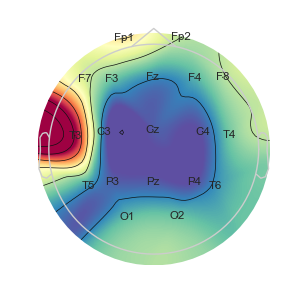

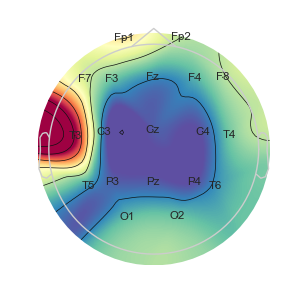

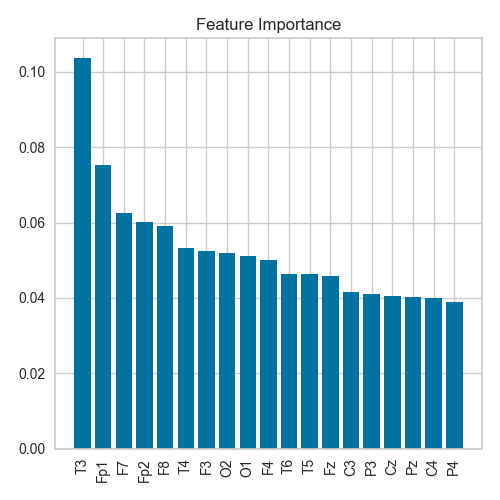

In [21]:
X = hfd_ml[hfd_ml['Y']!=2.0]
et_plot_importance(et, X.iloc[:, :-1])

## Petrosian FD

In [16]:
src_filename = "Dataset 2_petrosian_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
petrosian = pd.read_csv(src_path)
petrosian_ml = petrosian.copy()
petrosian_ml['Y'] = petrosian_ml['subject'].apply(assign_Y)
petrosian_ml.drop(['subject'], axis=1, inplace=True)

In [29]:
petrosian_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.007477  1.007851  1.007851  1.008597  1.005472  1.006351  1.005346   
1       1.008224  1.008224  1.007851  1.008473  1.005094  1.006727  1.005094   
2       1.008224  1.007726  1.007851  1.007477  1.006852  1.006727  1.006852   
3       1.008845  1.007601  1.007102  1.006100  1.006602  1.006226  1.006226   
4       1.008845  1.007601  1.006727  1.006602  1.006351  1.006977  1.006351   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.006226  1.006226  1.005975  1.005849  1.005724  1.005094  1.005975   
139530  1.006852  1.006602  1.006100  1.006226  1.006351  1.005598  1.006351   
139531  1.006977  1.006727  1.007477  1.007477  1.006476  1.006727  1.006977   
139532  1.007102  1.007227  1.008100  1.007352  1.006351  1.007352  1.006852   
139533  1.006602  1.006351  1.006602  1.005849  1.006351  1.006100  1.006226   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.006100  1.006727  1.007352  1.006977  1.006602  1.007601  1.007601   
1       1.006100  1.006852  1.007102  1.007102  1.007851  1.008100  1.007851   
2       1.006226  1.006602  1.007477  1.007227  1.007975  1.007851  1.008224   
3       1.005472  1.005724  1.006476  1.007352  1.007477  1.006727  1.008100   
4       1.006226  1.005849  1.005724  1.007477  1.007726  1.007477  1.008100   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.005849  1.005724  1.005346  1.006476  1.006351  1.007477  1.008100   
139530  1.006351  1.006852  1.006100  1.006100  1.006100  1.008100  1.007975   
139531  1.006226  1.007102  1.006226  1.005975  1.005724  1.009093  1.007975   
139532  1.006100  1.006351  1.005598  1.007102  1.006476  1.009712  1.008100   
139533  1.006100  1.006476  1.005598  1.007102  1.006100  1.009589  1.008473   

              T5        T6        Fz        Cz        Pz    Y  
0       1.006727  1.006852  1.006852  1.006351  1.006100  1.0  
1       1.007601  1.006100  1.006226  1.006977  1.005849  1.0  
2       1.007352  1.006977  1.006226  1.006727  1.006727  1.0  
3       1.006727  1.006226  1.006100  1.005598  1.005724  1.0  
4       1.006852  1.006226  1.006727  1.005346  1.005598  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  1.006100  1.005849  1.006226  1.006476  1.005724  3.0  
139530  1.006602  1.006351  1.006100  1.006226  1.006351  3.0  
139531  1.006476  1.005975  1.007227  1.006476  1.006727  3.0  
139532  1.006100  1.005598  1.007102  1.006100  1.006602  3.0  
139533  1.005975  1.006226  1.005849  1.005094  1.005975  3.0  

[139534 rows x 20 columns]

In [35]:
clf = setup(
    data=petrosian_ml[petrosian_ml['Y']!=3.0], 
    target='Y',
    fix_imbalance = True,
    )

In [36]:
knn = create_model('knn', fold=15)

## SVD

In [22]:
src_filename = "Dataset 2_svd_ent_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
svd = pd.read_csv(src_path)
svd_ml = svd.copy()
svd_ml['Y'] = svd_ml['subject'].apply(assign_Y)
svd_ml.drop(['subject'], axis=1, inplace=True)

## Normal Cross validation

In [23]:
svd_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       0.214120  0.214384  0.219951  0.286145  0.193350  0.183398  0.178296   
1       0.206201  0.215100  0.224788  0.275967  0.196291  0.192754  0.167677   
2       0.276394  0.265574  0.244420  0.232573  0.209643  0.221007  0.199490   
3       0.269988  0.228011  0.188035  0.171534  0.170376  0.173986  0.173822   
4       0.315316  0.269415  0.220764  0.218639  0.211719  0.228122  0.209847   
...          ...       ...       ...       ...       ...       ...       ...   
139529  0.188778  0.194251  0.201449  0.225938  0.180069  0.190593  0.186091   
139530  0.236166  0.249080  0.252204  0.280136  0.230336  0.247121  0.228063   
139531  0.198549  0.206168  0.194786  0.238196  0.171059  0.193250  0.167074   
139532  0.186676  0.186331  0.168977  0.189396  0.137037  0.155522  0.140191   
139533  0.221104  0.223954  0.197099  0.189289  0.158447  0.169831  0.158748   

              P4        O1        O2        F7        F8        T3        T4  \
0       0.168649  0.196114  0.191298  0.188710  0.237293  0.208314  0.215532   
1       0.173865  0.188030  0.182914  0.188698  0.262357  0.218019  0.234321   
2       0.210714  0.232155  0.229949  0.235124  0.283506  0.248607  0.292669   
3       0.177054  0.208285  0.200271  0.194537  0.203786  0.193907  0.224979   
4       0.232289  0.230982  0.234622  0.237052  0.248699  0.229113  0.263210   
...          ...       ...       ...       ...       ...       ...       ...   
139529  0.192664  0.212277  0.209476  0.186070  0.187730  0.366237  0.292494   
139530  0.244235  0.251995  0.249457  0.226269  0.240746  0.436896  0.352104   
139531  0.203083  0.201942  0.199321  0.219718  0.208791  0.436826  0.316276   
139532  0.169239  0.175699  0.169850  0.214939  0.190176  0.420694  0.255853   
139533  0.193897  0.193284  0.192136  0.242996  0.228182  0.431575  0.287206   

              T5        T6        Fz        Cz        Pz    Y  
0       0.206574  0.180212  0.173713  0.172891  0.171497  1.0  
1       0.199592  0.187101  0.180035  0.179485  0.171231  1.0  
2       0.227988  0.225505  0.215926  0.209317  0.208337  1.0  
3       0.209283  0.182139  0.180031  0.172925  0.173458  1.0  
4       0.245009  0.221300  0.216972  0.212946  0.217967  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  0.207712  0.201518  0.200687  0.189432  0.183811  3.0  
139530  0.257138  0.252276  0.255204  0.237096  0.230395  3.0  
139531  0.202620  0.200346  0.189466  0.185380  0.182377  3.0  
139532  0.177385  0.179777  0.149560  0.139781  0.155600  3.0  
139533  0.192661  0.225365  0.181966  0.165167  0.177169  3.0  

[139534 rows x 20 columns]

In [24]:
clf = setup(
    data=svd_ml[svd_ml['Y']!=2.0],
    target='Y',
    fix_imbalance = True,
)

In [36]:
best = compare_models(fold=15)

In [25]:
svd_knn = create_model('knn', fold=15)

In [26]:
svd_tuned_knn = tune_model(knn, fold=15)

In [27]:
svd_tuned_knn_results = pull()
svd_tuned_knn_results

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8283  0.8992  0.8645  0.7197  0.7855  0.6444  0.6519
1       0.8452  0.9097  0.8755  0.7440  0.8044  0.6777  0.6839
2       0.8333  0.9015  0.8560  0.7310  0.7886  0.6523  0.6579
3       0.8377  0.9108  0.8741  0.7315  0.7965  0.6633  0.6706
4       0.8351  0.9038  0.8793  0.7252  0.7949  0.6591  0.6677
5       0.8419  0.9054  0.8696  0.7405  0.7999  0.6706  0.6765
6       0.8360  0.8979  0.8554  0.7361  0.7913  0.6575  0.6625
7       0.8306  0.9005  0.8567  0.7263  0.7861  0.6475  0.6536
8       0.8363  0.9002  0.8638  0.7332  0.7931  0.6591  0.6652
9       0.8337  0.8968  0.8541  0.7326  0.7887  0.6529  0.6581
10      0.8360  0.9030  0.8573  0.7353  0.7917  0.6578  0.6630
11      0.8370  0.9071  0.8735  0.7306  0.7956  0.6618  0.6691
12      0.8304  0.8990  0.8618  0.7240  0.7869  0.6478  0.6546
13      0.8344  0.9036  0.8657  0.7292  0.7916  0.6559  0.6625
14      0.8438  0.9071  0.8670  0.7449  0.8013  0.6738  0.6791
Mean    0.8360  0.9030  0.8650  0.7323  0.7931  0.6588  0.6651
Std     0.0046  0.0041  0.0079  0.0069  0.0055  0.0093  0.0092

In [28]:
svd_et = create_model('et', fold=15)

In [29]:
svd_rf = create_model('rf', fold=15)

In [37]:
tuned_et = tune_model(et, fold=15)

In [30]:
svd_xgb = create_model('xgboost', fold=15)

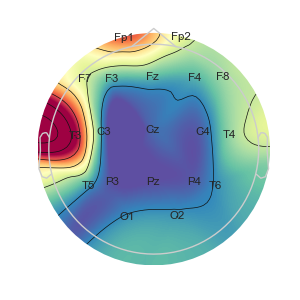

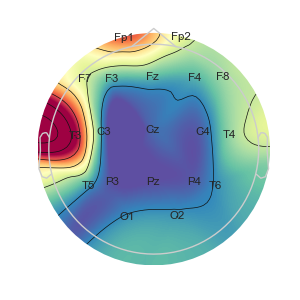

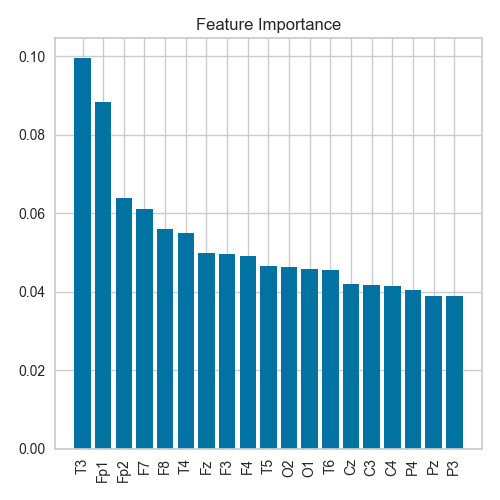

In [31]:
X = svd_ml[svd_ml['Y']!=2.0]
et_plot_importance(svd_et, X.iloc[:, :-1])

## Approx Entropy

In [ ]:
src_filename = "Dataset 2_app_ent_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
approx_ent = pd.read_csv(src_path)
approx_ent_ml = approx_ent.copy()
approx_ent_ml['Y'] = approx_ent_ml['subject'].apply(assign_Y)
approx_ent_ml.drop(['subject'], axis=1, inplace=True)
approx_ent_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       0.336209  0.328067  0.313332  0.429838  0.260297  0.237376  0.231460   
1       0.247396  0.269350  0.289854  0.384998  0.237584  0.222722  0.186046   
2       0.398988  0.406081  0.351926  0.328010  0.282242  0.301568  0.261731   
3       0.383853  0.302715  0.221341  0.191433  0.190857  0.198748  0.195149   
4       0.446976  0.359995  0.265667  0.261316  0.243872  0.271369  0.239764   
...          ...       ...       ...       ...       ...       ...       ...   
139529  0.225901  0.236321  0.247294  0.288736  0.202290  0.230000  0.222070   
139530  0.367954  0.392661  0.386229  0.457149  0.355136  0.373769  0.353703   
139531  0.272838  0.306837  0.266437  0.376661  0.217718  0.263681  0.220270   
139532  0.208192  0.209823  0.164133  0.209739  0.117695  0.150183  0.120083   
139533  0.303640  0.315733  0.251828  0.242682  0.169616  0.212529  0.173191   

              P4        O1        O2        F7        F8        T3        T4  \
0       0.209567  0.263171  0.254995  0.260551  0.348108  0.288109  0.293573   
1       0.179530  0.219956  0.215204  0.213662  0.383383  0.272611  0.306035   
2       0.284678  0.335944  0.338652  0.331029  0.428825  0.344782  0.474630   
3       0.208362  0.268743  0.249580  0.233952  0.258230  0.220950  0.303756   
4       0.293738  0.286191  0.295758  0.290738  0.318844  0.280278  0.359885   
...          ...       ...       ...       ...       ...       ...       ...   
139529  0.232475  0.285299  0.284413  0.214544  0.221316  0.517636  0.425765   
139530  0.381020  0.398487  0.389867  0.356048  0.388653  0.615950  0.559917   
139531  0.311777  0.303917  0.317022  0.322650  0.317118  0.600388  0.517894   
139532  0.177126  0.179443  0.174089  0.260066  0.216102  0.574939  0.342879   
139533  0.258653  0.256950  0.255350  0.342354  0.331430  0.592390  0.435028   

              T5        T6        Fz        Cz        Pz    Y  
0       0.271500  0.243105  0.221065  0.212854  0.212587  1.0  
1       0.236689  0.215557  0.201607  0.204305  0.187890  1.0  
2       0.314920  0.312611  0.294345  0.274276  0.286320  1.0  
3       0.256843  0.217025  0.208212  0.193617  0.199238  1.0  
4       0.303255  0.260962  0.254320  0.242172  0.257208  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  0.268408  0.241261  0.242772  0.215209  0.213044  3.0  
139530  0.405365  0.402121  0.384087  0.365411  0.358748  3.0  
139531  0.295699  0.301157  0.258851  0.258451  0.257027  3.0  
139532  0.185759  0.202225  0.124370  0.117217  0.148119  3.0  
139533  0.241802  0.324159  0.230277  0.198377  0.226856  3.0  

[139534 rows x 20 columns]

In [54]:
clf = setup(
    data=approx_ent_ml[approx_ent_ml['Y']!=3.0],
    target='Y',
    fix_imbalance = True,
)

In [59]:
compare_models(fold=15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
knn = create_model('knn', fold=15)

In [60]:
tuned_knn = tune_model(knn, fold=15)

In [58]:
et = create_model('et', fold=15)

## Number of Zero Crossings

In [32]:
src_filename = "Dataset 2_num_zerocross_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
num_zero = pd.read_csv(src_path)
num_zero_ml = num_zero.copy()
num_zero_ml['Y'] = num_zero_ml['subject'].apply(assign_Y)
num_zero_ml.drop(['subject'], axis=1, inplace=True)
num_zero_ml

Fp1  Fp2  F3  F4  C3  C4  P3  P4  O1  O2  F7  F8  T3  T4  T5  T6  Fz  \
0        14   14  20  19  18  14  14  16  16  14  14  10  18  22  14  12  14   
1         8   12  16  16  10  10   6  11   8  10  14  14  12  18   8   8  10   
2         6   10  16  12  10  12   8  10  12  14  12  20  12  18  10  10  10   
3        12   10  12   8  10  10   8   7  12  10   8  10  12  14  10  12   8   
4        21   17  19  17  23  17  15  13  17  15  15  19  15  19  15  15  15   
...     ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
139529    7    7   5   7   3   7   7   7   7   7   5   7  15   9   5   9   7   
139530   12   18   8  16   6  16  10  16  14  14  12  16  27  22  14  14  17   
139531    8   14   8  15   6  15   9  13  13  11  12  14  29  21  15   9  16   
139532    5    5   3   5   5   7   7   3   5   3  11   5  22   5   5   5   5   
139533   14   16   6   9   7   7   7   5   5   7  18  11  29  13   5   9  10   

        Cz  Pz    Y  
0       13  14  1.0  
1        8   6  1.0  
2       12  10  1.0  
3       10  10  1.0  
4       15  13  1.0  
...     ..  ..  ...  
139529   5   5  3.0  
139530  13  10  3.0  
139531  13   9  3.0  
139532   5   5  3.0  
139533   7   7  3.0  

[139534 rows x 20 columns]

In [33]:
clf = setup(
    data=num_zero_ml[num_zero_ml['Y']!=2.0],
    target='Y',
    fix_imbalance = True,
    normalize = True
)

In [72]:
compare_models(fold=15)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=844, verbose=0,
                     warm_start=False)

In [34]:
zcr_knn = create_model('knn', fold=15)

In [35]:
zcr_xgb = create_model('xgboost', fold=15)

In [36]:
zcr_et = create_model('et', fold=15)

In [37]:
zcr_rf = create_model('rf', fold=15)

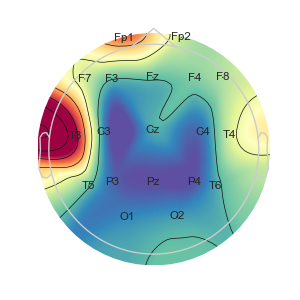

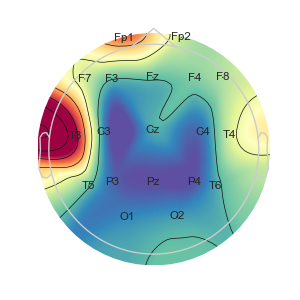

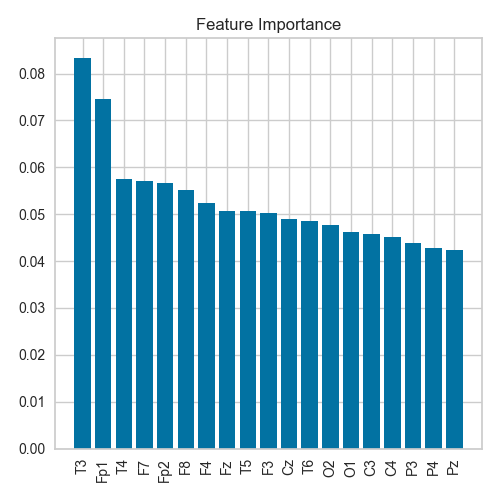

In [38]:
X = num_zero_ml[num_zero_ml['Y']!=2.0]
et_plot_importance(zcr_rf, X.iloc[:, :-1])

## Detrended Fluctuation

In [39]:
src_filename = "Dataset 2_det_fluc_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
det_fluc = pd.read_csv(src_path)
det_fluc_ml = det_fluc.copy()
det_fluc_ml['Y'] = det_fluc_ml['subject'].apply(assign_Y)
det_fluc_ml.drop(['subject'], axis=1, inplace=True)
det_fluc_ml

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       1.567087  1.555791  1.615496  1.400903  1.698172  1.662095  1.751389   
1       1.509575  1.516471  1.570646  1.434402  1.693811  1.651536  1.808789   
2       1.518817  1.561233  1.616406  1.623050  1.712835  1.618705  1.754439   
3       1.499831  1.588973  1.731731  1.762343  1.784695  1.757611  1.773752   
4       1.485549  1.592503  1.751888  1.749377  1.761357  1.727159  1.754384   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.759757  1.739605  1.716994  1.671121  1.784079  1.780361  1.791943   
139530  1.694971  1.654196  1.678556  1.611177  1.699380  1.754934  1.722043   
139531  1.682611  1.686140  1.640975  1.579668  1.707918  1.727855  1.728403   
139532  1.630445  1.646090  1.632896  1.632856  1.732194  1.705249  1.730558   
139533  1.671657  1.671645  1.706559  1.780457  1.778862  1.820054  1.775545   

              P4        O1        O2        F7        F8        T3        T4  \
0       1.743529  1.704355  1.726433  1.668859  1.554123  1.639198  1.575511   
1       1.730058  1.775161  1.780875  1.650424  1.507554  1.630627  1.497938   
2       1.670934  1.702762  1.676250  1.628183  1.528047  1.596794  1.478368   
3       1.791113  1.708063  1.727798  1.677042  1.640387  1.715561  1.608562   
4       1.737461  1.729354  1.738494  1.671205  1.640072  1.703542  1.625461   
...          ...       ...       ...       ...       ...       ...       ...   
139529  1.771919  1.739127  1.759250  1.773995  1.759974  1.368646  1.498978   
139530  1.766846  1.682592  1.734355  1.710922  1.675000  1.280822  1.440096   
139531  1.727978  1.713362  1.728471  1.644798  1.692214  1.237227  1.458687   
139532  1.706239  1.679379  1.704830  1.581511  1.644359  1.253234  1.497460   
139533  1.782557  1.730535  1.748052  1.636990  1.682340  1.236132  1.558650   

              T5        T6        Fz        Cz        Pz    Y  
0       1.697498  1.719671  1.715329  1.756679  1.758658  1.0  
1       1.748023  1.710584  1.687875  1.736826  1.786298  1.0  
2       1.686220  1.631067  1.704046  1.700324  1.713729  1.0  
3       1.689759  1.742098  1.738070  1.757295  1.780591  1.0  
4       1.703827  1.737968  1.757566  1.774335  1.749918  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  1.735090  1.739126  1.704222  1.736241  1.794389  3.0  
139530  1.660026  1.707522  1.660412  1.692719  1.753268  3.0  
139531  1.713007  1.732410  1.666810  1.679689  1.733459  3.0  
139532  1.680645  1.718796  1.689960  1.708100  1.726749  3.0  
139533  1.718684  1.716335  1.734959  1.774126  1.790536  3.0  

[139534 rows x 20 columns]

In [40]:
clf = setup(
    data=det_fluc_ml[det_fluc_ml['Y']!=2.0],
    target='Y',
    fix_imbalance = True,
)

In [69]:
compare_models(fold=15)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=844, verbose=0,
                     warm_start=False)

In [41]:
dfa_knn = create_model('knn', fold=15)

In [42]:
dfa_et = create_model('et', fold=15)

In [43]:
dfa_xgb = create_model('xgboost', fold=15)

In [44]:
dfa_rf = create_model('rf', fold=15)

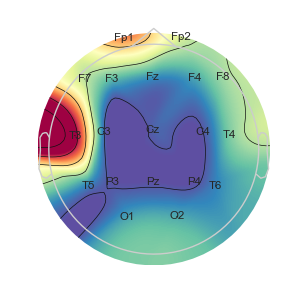

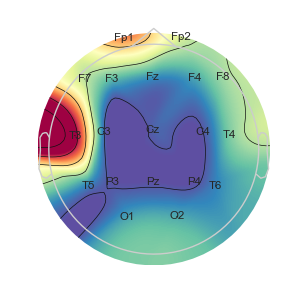

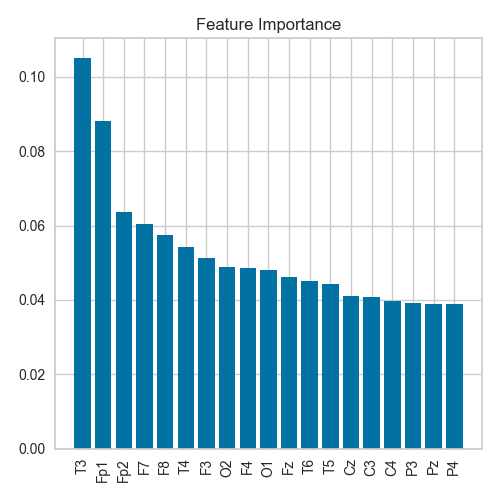

In [45]:
X = det_fluc_ml[det_fluc_ml['Y']!=2.0]
et_plot_importance(dfa_et, X.iloc[:, :-1])

## Hjorth Parameters

In [46]:
src_filename = "Dataset 2_hjorth_50pct.csv"
src_path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/{src_filename}"
hjorth = pd.read_csv(src_path)
hjorth_ml = hjorth.copy()
hjorth_ml['Y'] = hjorth_ml['subject'].apply(assign_Y)
hjorth_ml.drop(['subject'], axis=1, inplace=True)
hjorth_ml

Fp1  \
0        (0.08396628470468122, 4.503675397768219)   
1        (0.06397691724973656, 6.527369656660902)   
2        (0.10491914878478126, 3.889698200662353)   
3        (0.09597885638613408, 4.260958295401249)   
4       (0.11773034323381658, 3.4152382730271023)   
...                                           ...   
139529   (0.05899003325667036, 4.844957066950173)   
139530   (0.09161973100640154, 3.232136980330363)   
139531    (0.07254211492885253, 4.33089912664209)   
139532   (0.05590582922313988, 6.400667888830768)   
139533   (0.07818104231349667, 4.470355779087582)   

                                              Fp2  \
0        (0.07933741434654852, 4.968856900029781)   
1        (0.06840346028006818, 6.092460315124997)   
2        (0.09908212481480856, 4.011532700066896)   
3        (0.07630205917505714, 5.066248366256245)   
4        (0.09291610285703668, 4.100844088725464)   
...                                           ...   
139529   (0.06138487378765946, 4.669265683580933)   
139530  (0.09836696524888615, 3.0925770713992367)   
139531   (0.0772592483349542, 3.9492955093885334)   
139532    (0.0560424474737619, 6.144767287097009)   
139533   (0.07950635040042522, 4.365425502698088)   

                                              F3  \
0       (0.07864923542360573, 4.642514419823844)   
1       (0.07346968425984696, 5.406968298673193)   
2       (0.08805660850202025, 4.545719398068762)   
3       (0.05963723480894356, 5.846219702658155)   
4       (0.07058508279351078, 4.660351503798317)   
...                                          ...   
139529  (0.06396882374383861, 4.733261192464804)   
139530  (0.09896729361861523, 3.106048120882222)   
139531   (0.06840919034888474, 5.36098786939439)   
139532  (0.04838066917000009, 7.875181621284347)   
139533  (0.06777467222098592, 4.833871500198554)   

                                               F4  \
0       (0.11312925951571386, 3.7916362771844696)   
1        (0.09770371522442392, 4.413260642091093)   
2        (0.08158388317599738, 4.724710055607551)   
3        (0.052852713259059624, 5.76748752867947)   
4         (0.06990015368945152, 4.61470144630107)   
...                                           ...   
139529   (0.07476653586834127, 4.238822113580676)   
139530   (0.11477316806955866, 2.869813376919947)   
139531   (0.09008070349138612, 4.113617985525523)   
139532   (0.05674093980854795, 6.531321494751707)   
139533  (0.06337795989458594, 5.0666002960714795)   

                                               C3  \
0        (0.06738580869529348, 5.000408980079307)   
1        (0.06148223439177864, 5.777820718487194)   
2       (0.07162165171634007, 4.9264890658270994)   
3       (0.052563505787647194, 5.833262777683776)   
4         (0.0674030900689423, 4.429711665823331)   
...                                           ...   
139529    (0.0554917313690411, 5.063140207824089)   
139530  (0.08958842866770932, 3.2915007386640585)   
139531   (0.05923839860365124, 5.104006991489232)   
139532   (0.03756813097127863, 8.123009704531954)   
139533  (0.050549063341614346, 5.579184405723775)   

                                               C4  \
0        (0.06394989952620653, 5.389810029765793)   
1       (0.059660815802307164, 6.118958750046785)   
2        (0.07682005984464353, 4.809899173344427)   
3        (0.053339366668583764, 6.01585556368191)   
4        (0.07403068832234591, 4.619111193292838)   
...                                           ...   
139529   (0.06006407203418509, 4.667426209521834)   
139530    (0.09767433864020979, 2.95365931957194)   
139531   (0.06908414186641658, 4.634643794546525)   
139532   (0.04411211249378359, 7.367941732311304)   
139533  (0.056617126053385446, 5.046691146983923)   

                                                P3  \
0         (0.06008920651116052, 4.930091664993406)   
1         (0.05079639429824086, 5.733263765363229)   
2         (0.0668067000908471, 4.9804268749091225)   
3         (0.0538855

In [47]:
X1 = hjorth_ml.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)

In [48]:
X1 = pd.concat([X1, hjorth_ml.iloc[:, -1]], axis=1)
X1

Fp1       Fp2        F3        F4        C3        C4        P3  \
0       2.293821  2.524097  2.360582  1.952383  2.533897  2.726880  2.495090   
1       3.295673  3.080432  2.740219  2.255482  2.919651  3.089310  2.892030   
2       1.997309  2.055307  2.316888  2.403147  2.499055  2.443360  2.523617   
3       2.178469  2.571275  2.952928  2.910170  2.942913  3.034597  2.960297   
4       1.766484  2.096880  2.365468  2.342301  2.248557  2.346571  2.248309   
...          ...       ...       ...       ...       ...       ...       ...   
139529  2.451974  2.365325  2.398615  2.156794  2.559316  2.363745  2.311527   
139530  1.661878  1.595472  1.602508  1.492293  1.690545  1.525667  1.644588   
139531  2.201721  2.013277  2.714699  2.101849  2.581623  2.351864  2.591988   
139532  3.228287  3.100405  3.961781  3.294031  4.080289  3.706027  3.969295   
139533  2.274268  2.222466  2.450823  2.564989  2.814867  2.551654  2.944953   

              P4        O1        O2        F7        F8        T3        T4  \
0       2.659154  2.458074  2.417653  2.561678  2.248846  2.235656  2.542479   
1       3.263695  2.765791  2.814759  3.134782  2.120296  2.682607  2.658698   
2       2.381145  2.115109  2.186189  2.342543  1.927623  2.226503  1.817066   
3       2.692122  2.580440  2.634450  3.028569  2.887228  2.949396  2.590582   
4       1.943006  2.099323  1.980856  2.314233  2.326754  2.333143  2.140208   
...          ...       ...       ...       ...       ...       ...       ...   
139529  2.376333  2.004194  2.090189  2.585295  2.485544  1.457162  1.854940   
139530  1.551271  1.611624  1.559690  1.754527  1.655987  1.057397  1.294827   
139531  2.004214  2.296803  2.093144  2.022469  1.998577  1.063064  1.548036   
139532  3.141060  3.294648  3.216958  2.775815  3.036939  1.276970  2.362651   
139533  2.258119  2.452556  2.330014  2.102104  2.182713  1.168611  1.911656   

              T5        T6        Fz        Cz        Pz    Y  
0       2.411301  2.520986  2.783160  2.586030  2.527715  1.0  
1       2.627736  3.002168  3.205992  3.016059  3.018355  1.0  
2       2.198443  2.307015  2.429532  2.492532  2.404893  1.0  
3       2.673455  2.820208  2.895405  2.925371  2.903585  1.0  
4       2.035380  2.150299  2.319629  2.139815  2.091239  1.0  
...          ...       ...       ...       ...       ...  ...  
139529  2.122982  2.517933  2.310630  2.484931  2.454706  3.0  
139530  1.514392  1.575896  1.540455  1.655443  1.679383  3.0  
139531  2.276969  2.101099  2.472307  2.463765  2.325230  3.0  
139532  3.250619  2.853347  4.331884  4.419494  3.447455  3.0  
139533  2.525513  1.994562  2.641293  2.681032  2.420528  3.0  

[139534 rows x 20 columns]

In [49]:
clf = setup(
    data=X1[X1['Y']!=2.0],
    target='Y',
    fix_imbalance = True,
    normalize = True
)

In [81]:
compare_models(fold=15)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6987, verbose=0,
                       warm_start=False)

In [50]:
hjorth_rf = create_model('rf', fold=15)

In [51]:
hjorth_knn = create_model('knn', fold=15)

In [52]:
hjorth_et = create_model('et', fold=15)

In [53]:
hjorth_xgb = create_model('xgboost', fold=15)

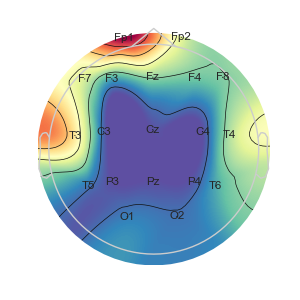

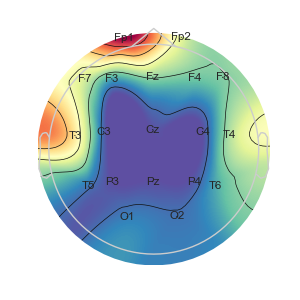

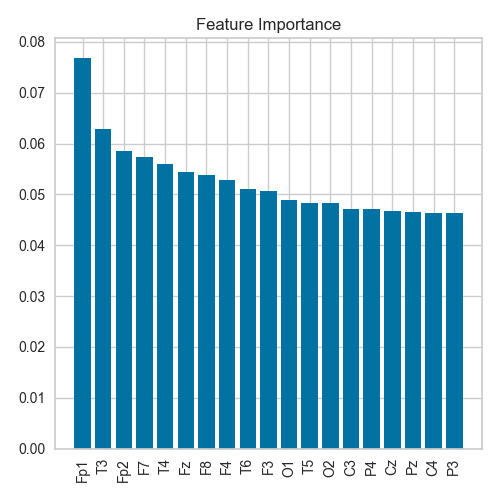

In [56]:
X = hjorth_ml[hjorth_ml['Y']!=2.0]
et_plot_importance(hjorth_et, X.iloc[:, :-1])

In [4]:
subject = 'sub-001'
path = f"C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Alzheimer's/Dataset 2/derivatives/{subject}/eeg/"
filename = f"{subject}_task-eyesclosed_eeg.set"
EEG_data = mne.io.read_raw_eeglab(f"{path}{filename}", preload=True)

Using matplotlib as 2D backend.
Opening raw-browser...


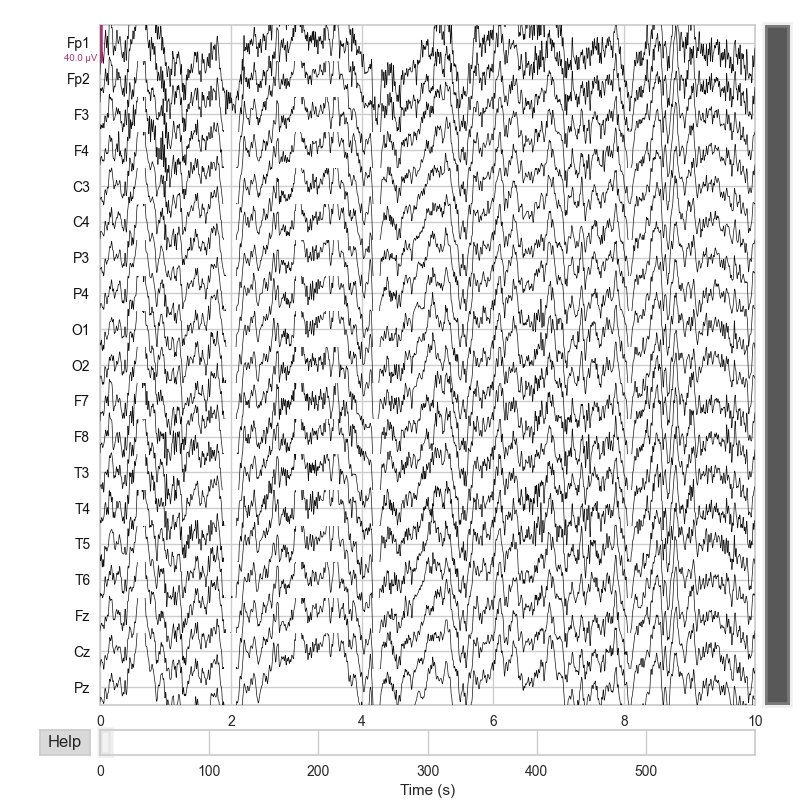

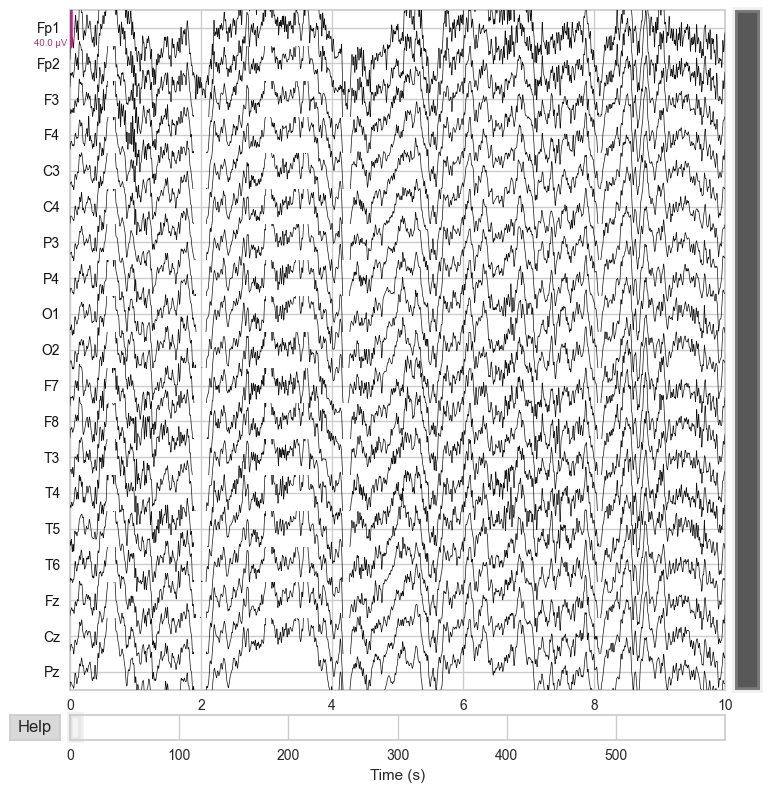

In [5]:
# enable matplotlib widgets for plotting
%matplotlib widget
EEG_data.plot()

In [6]:
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    2.2s finished


Opening raw-browser...


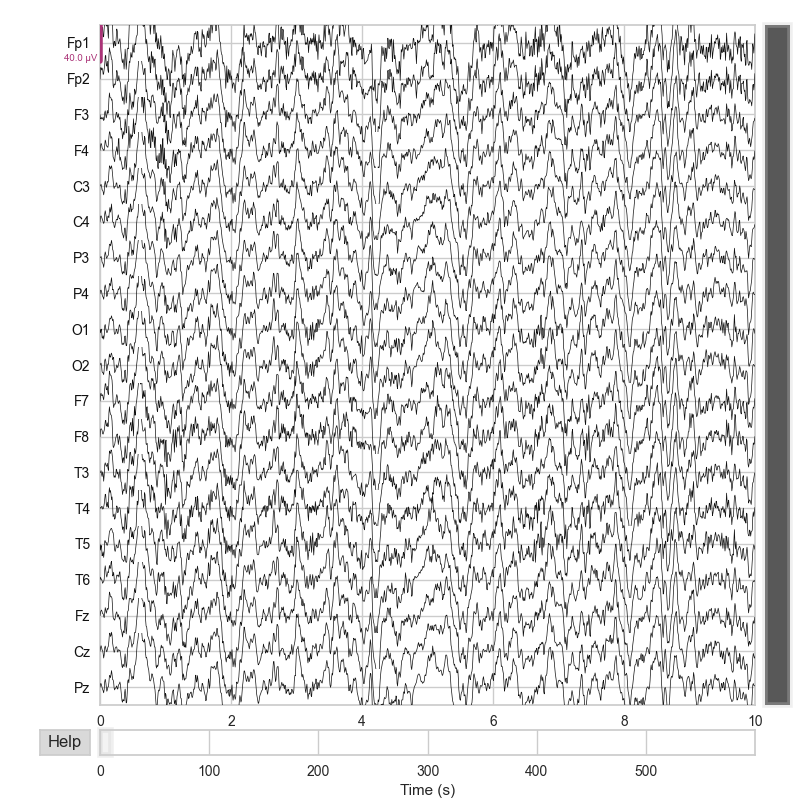

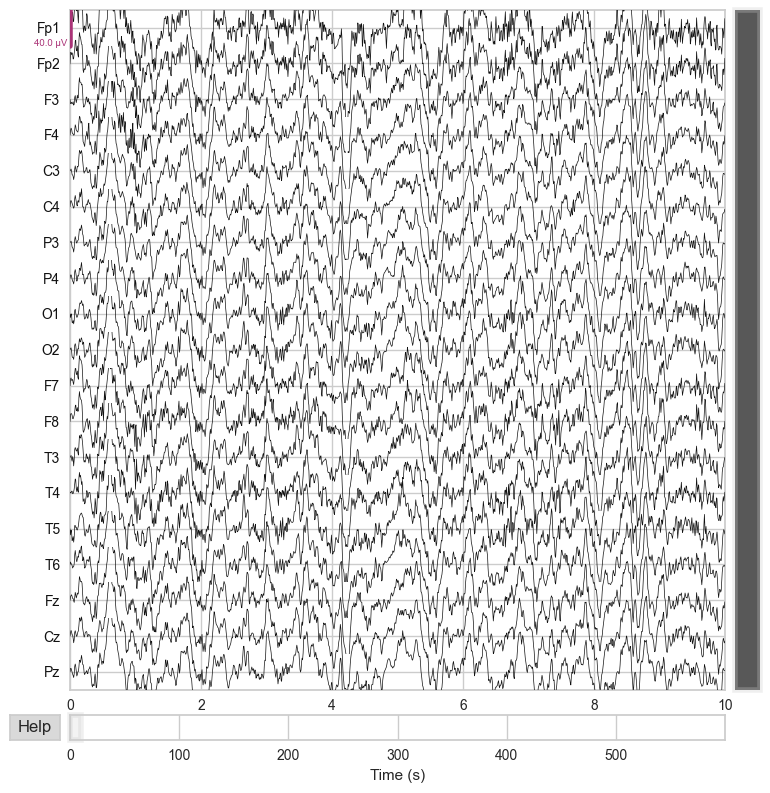

In [7]:

#raw.crop(tmax=500)
raw.plot()

In [8]:
std_montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(std_montage)

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.5s.


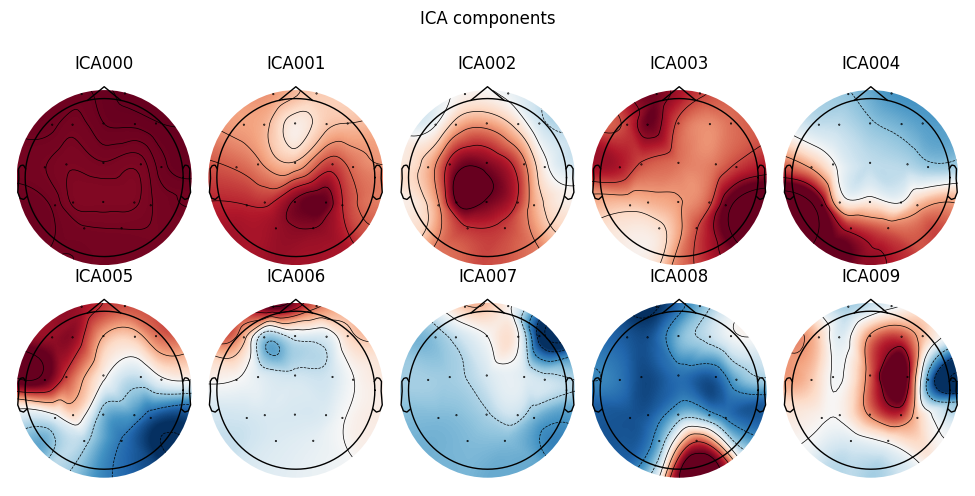

[<MNEFigure size 975x496 with 10 Axes>]

In [8]:
ica = mne.preprocessing.ICA(n_components=10, random_state=0)
ica.fit(raw.copy())
ica.plot_components(outlines='head')

In [9]:
500*300

150000

In [10]:
xRaw = raw.get_data()
len(xRaw[0])

299900

## Calculating Fractal Dimensions

In [122]:
#len(x_raw)
df_higuchi = pd.DataFrame(columns = raw.ch_names) # Higuchi
df_katz = pd.DataFrame(columns = raw.ch_names) # Katz
df_petrosian = pd.DataFrame(columns = raw.ch_names) # Petrosian
df_spec_ent = pd.DataFrame(columns = raw.ch_names)  # Spectral Entropy
df_perm_ent = pd.DataFrame(columns = raw.ch_names)  # Permutation Entropy

df_svd_ent = pd.DataFrame(columns = raw.ch_names)  # SVD Entropy
df_app_ent = pd.DataFrame(columns = raw.ch_names)  # Approximate Entropy
df_samp_ent = pd.DataFrame(columns = raw.ch_names)  # Sample Entropy
df_hjorth = pd.DataFrame(columns = raw.ch_names)  # Hjorth mobility and complexity
df_num_zerocross = pd.DataFrame(columns = raw.ch_names)  # Number of zero crossings
df_lziv = pd.DataFrame(columns = raw.ch_names)  # LZIV complexity
df_det_fluc = pd.DataFrame(columns = raw.ch_names)  # Detrended Fluctuation


channel_no=0
for row in xRaw: #row === channel_no.
    
    hig_channel_series = []
    katz_channel_series = []
    petrosian_channel_series = []
    spec_ent_channel_series = []
    perm_ent_channel_series = []

    df_svd_ent_channel_series = []
    df_app_ent_channel_series = []
    df_samp_ent_channel_series = []
    df_hjorth_channel_series = []
    df_num_zerocross_channel_series = []
    df_lziv_channel_series = []
    df_det_fluc_channel_series = []
    
    for i in range(500,len(xRaw[0]),250):
        hig_channel_series.append(ant.higuchi_fd(row[i-500:i]))
        katz_channel_series.append(ant.katz_fd(row[i-500:i]))
        petrosian_channel_series.append(ant.petrosian_fd(row[i-500:i]))
        spec_ent_channel_series.append(ant.spectral_entropy(row[i-500:i], sf=1000, method='welch', normalize=True))
        perm_ent_channel_series.append(ant.perm_entropy(row[i-500:i], normalize=True))

        df_svd_ent_channel_series.append(ant.svd_entropy(row[i-500:i], normalize=True))
        df_app_ent_channel_series.append(ant.app_entropy(row[i-500:i]))
        df_samp_ent_channel_series.append(ant.sample_entropy(row[i-500:i]))
        df_hjorth_channel_series.append(ant.hjorth_params(row[i-500:i]))
        df_num_zerocross_channel_series.append(ant.num_zerocross(row[i-500:i]))
        df_lziv_channel_series.append(ant.lziv_complexity(row[i-500:i]))
        df_det_fluc_channel_series.append(ant.detrended_fluctuation(row[i-500:i]))


        
    df_higuchi.iloc[:,channel_no] = hig_channel_series
    df_katz.iloc[:,channel_no] = katz_channel_series
    df_petrosian.iloc[:,channel_no] = petrosian_channel_series
    df_spec_ent.iloc[:,channel_no] = spec_ent_channel_series
    df_perm_ent.iloc[:,channel_no] = perm_ent_channel_series

    df_svd_ent.iloc[:,channel_no] = df_svd_ent_channel_series
    df_app_ent.iloc[:,channel_no] = df_app_ent_channel_series
    df_samp_ent.iloc[:,channel_no] = df_samp_ent_channel_series
    df_hjorth.iloc[:,channel_no] = df_hjorth_channel_series
    df_num_zerocross.iloc[:,channel_no] = df_num_zerocross_channel_series
    df_lziv.iloc[:,channel_no] = df_lziv_channel_series
    df_det_fluc.iloc[:,channel_no] = df_det_fluc_channel_series
    
    #print(len(channel_series))
    channel_no += 1

In [123]:
subject_num = int(subject.split('-')[1])

df_higuchi['subject'] = subject_num
df_katz['subject'] = subject_num
df_petrosian['subject'] = subject_num
df_spec_ent['subject'] = subject_num
df_perm_ent['subject'] = subject_num

df_svd_ent['subject'] = subject_num
df_app_ent['subject'] = subject_num
df_samp_ent['subject'] = subject_num
df_hjorth['subject'] = subject_num
df_num_zerocross['subject'] = subject_num
df_lziv['subject'] = subject_num
df_det_fluc['subject'] = subject_num

In [124]:
df_higuchi

Fp1       Fp2        F3        F4        C3        C4        P3  \
0     1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1     1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2     1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3     1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4     1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
...        ...       ...       ...       ...       ...       ...       ...   
1193  1.203956  1.176720  1.148438  1.169821  1.105924  1.133395  1.096778   
1194  1.162709  1.147875  1.136804  1.156320  1.076753  1.097214  1.076402   
1195  1.166250  1.137733  1.115271  1.140185  1.096645  1.090363  1.098750   
1196  1.185069  1.143276  1.140866  1.137405  1.148793  1.130881  1.150957   
1197  1.224555  1.198214  1.172131  1.188813  1.156351  1.153924  1.161466   

            P4        O1        O2        F7        F8        T3        T4  \
0     1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1     1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2     1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3     1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4     1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
...        ...       ...       ...       ...       ...       ...       ...   
1193  1.140995  1.144087  1.152370  1.127198  1.133993  1.152221  1.141933   
1194  1.109695  1.123857  1.111220  1.103417  1.130825  1.139860  1.134683   
1195  1.110173  1.133471  1.125489  1.096383  1.150675  1.124500  1.135337   
1196  1.158326  1.184165  1.182140  1.111430  1.200517  1.162726  1.161013   
1197  1.170155  1.206252  1.179005  1.164101  1.216123  1.198975  1.180266   

            T5        T6        Fz        Cz        Pz  subject  
0     1.171727  1.163786  1.152476  1.126287  1.124646        1  
1     1.150693  1.163956  1.178028  1.143244  1.116295        1  
2     1.190243  1.185215  1.185677  1.171128  1.154459        1  
3     1.188784  1.151214  1.150435  1.138357  1.135601        1  
4     1.183954  1.164263  1.159580  1.146279  1.150185        1  
...        ...       ...       ...       ...       ...      ...  
1193  1.159453  1.158983  1.140734  1.135602  1.119165        1  
1194  1.141256  1.116931  1.124618  1.090753  1.089294        1  
1195  1.147037  1.135495  1.109567  1.096506  1.099124        1  
1196  1.204797  1.172085  1.130467  1.137799  1.147968        1  
1197  1.205343  1.175113  1.161936  1.160718  1.162774        1  

[1198 rows x 20 columns]

In [90]:
df_higuchi_final = df_higuchi_final.append(df_higuchi)
df_katz_final = df_katz_final.append(df_katz)
df_petrosian_final = df_petrosian_final.append(df_petrosian)
df_spec_ent_final = df_spec_ent_final.append(df_spec_ent)
df_perm_ent_final = df_perm_ent_final.append(df_perm_ent)

df_svd_ent_final = df_svd_ent_final.append(df_svd_ent)
df_app_ent_final = df_app_ent_final.append(df_app_ent)
df_samp_ent_final = df_samp_ent_final.append(df_samp_ent)
df_hjorth_final = df_hjorth_final.append(df_hjorth)
df_num_zerocross_final = df_num_zerocross_final.append(df_num_zerocross)
df_lziv_final = df_lziv_final.append(df_lziv)
df_det_fluc_final = df_det_fluc_final.append(df_det_fluc)

C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_higuchi_final = df_higuchi_final.append(df_higuchi)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_katz_final = df_katz_final.append(df_katz)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_petrosian_final = df_petrosian_final.append(df_petrosian)
C:\Users\utkar\AppData\Local\Temp\ipykernel_12156\2552808048.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spec_ent_final = df_spec_en

In [91]:
df_higuchi_final

Fp1       Fp2        F3        F4        C3        C4        P3  \
0    1.245382  1.247795  1.212072  1.291242  1.151684  1.183958  1.112419   
1    1.278525  1.265480  1.236430  1.302918  1.159453  1.179024  1.095359   
2    1.263084  1.233825  1.240496  1.208278  1.181422  1.182599  1.153058   
3    1.274437  1.234501  1.171563  1.143764  1.136117  1.153411  1.143662   
4    1.282211  1.248464  1.172801  1.168543  1.151246  1.193585  1.146699   
..        ...       ...       ...       ...       ...       ...       ...   
606  1.134276  1.105311  1.175530  1.106314  1.105454  1.100158  1.095131   
607  1.103117  1.107655  1.143950  1.116078  1.158445  1.143994  1.135706   
608  1.103322  1.112459  1.121470  1.121639  1.159068  1.120924  1.137778   
609  1.112503  1.123904  1.122747  1.107520  1.130848  1.109386  1.134373   
610  1.091373  1.091952  1.108457  1.094704  1.148605  1.136028  1.141484   

           P4        O1        O2        F7        F8        T3        T4  \
0    1.143296  1.163221  1.148315  1.184836  1.244224  1.196824  1.250657   
1    1.147910  1.134545  1.136097  1.201170  1.255257  1.198960  1.277501   
2    1.159248  1.177100  1.175762  1.221208  1.252666  1.233842  1.273886   
3    1.128243  1.176359  1.160779  1.204924  1.235430  1.178732  1.233996   
4    1.151804  1.167652  1.159738  1.202375  1.244359  1.181253  1.239636   
..        ...       ...       ...       ...       ...       ...       ...   
606  1.053232  1.091414  1.061572  1.149479  1.105178  1.117408  1.122320   
607  1.066070  1.111821  1.072578  1.106193  1.096204  1.118429  1.095192   
608  1.057771  1.125955  1.069511  1.112411  1.108248  1.126414  1.078242   
609  1.069238  1.137728  1.085183  1.123478  1.129155  1.131576  1.094506   
610  1.127101  1.126232  1.128836  1.088473  1.080808  1.103025  1.077915   

           T5        T6        Fz        Cz        Pz  subject  
0    1.171727  1.163786  1.152476  1.126287  1.124646      1.0  
1    1.150693  1.163956  1.178028  1.143244  1.116295      1.0  
2    1.190243  1.185215  1.185677  1.171128  1.154459      1.0  
3    1.188784  1.151214  1.150435  1.138357  1.135601      1.0  
4    1.183954  1.164263  1.159580  1.146279  1.150185      1.0  
..        ...       ...       ...       ...       ...      ...  
606  1.089963  1.085612  1.119520  1.130580  1.069499      3.0  
607  1.103122  1.058235  1.114206  1.160042  1.079342      3.0  
608  1.105286  1.057276  1.086104  1.119876  1.093302      3.0  
609  1.120815  1.064462  1.093642  1.114928  1.123415      3.0  
610  1.122250  1.090261  1.104428  1.141015  1.140458      3.0  

[1610 rows x 20 columns]

In [76]:
999*2

1998

In [75]:
df_det_fluc_final

Fp1       Fp2        F3        F4        C3        C4        P3  \
0    1.567087  1.555791  1.615496  1.400903  1.698172  1.662095  1.751389   
1    1.509575  1.516471  1.570646  1.434402  1.693811  1.651536  1.808789   
2    1.518817  1.561233  1.616406  1.623050  1.712835  1.618705  1.754439   
3    1.499831  1.588973  1.731731  1.762343  1.784695  1.757611  1.773752   
4    1.485549  1.592503  1.751888  1.749377  1.761357  1.727159  1.754384   
..        ...       ...       ...       ...       ...       ...       ...   
994  1.703484  1.731202  1.728291  1.728683  1.772490  1.796733  1.800615   
995  1.789780  1.838521  1.819737  1.802690  1.831856  1.877983  1.839204   
996  1.707816  1.724999  1.802150  1.724765  1.823693  1.822693  1.828213   
997  1.731842  1.742370  1.809057  1.736136  1.852724  1.792003  1.830049   
998  1.672482  1.738015  1.775539  1.769728  1.756635  1.779170  1.766290   

           P4        O1        O2        F7        F8        T3        T4  \
0    1.743529  1.704355  1.726433  1.668859  1.554123  1.639198  1.575511   
1    1.730058  1.775161  1.780875  1.650424  1.507554  1.630627  1.497938   
2    1.670934  1.702762  1.676250  1.628183  1.528047  1.596794  1.478368   
3    1.791113  1.708063  1.727798  1.677042  1.640387  1.715561  1.608562   
4    1.737461  1.729354  1.738494  1.671205  1.640072  1.703542  1.625461   
..        ...       ...       ...       ...       ...       ...       ...   
994  1.782346  1.755763  1.771750  1.774656  1.707207  1.765563  1.741640   
995  1.822823  1.777847  1.779595  1.887308  1.813267  1.838527  1.837412   
996  1.842075  1.767222  1.818184  1.835309  1.751865  1.833506  1.767907   
997  1.792620  1.744357  1.784449  1.795450  1.741718  1.777277  1.757345   
998  1.764307  1.702391  1.743792  1.734846  1.748707  1.670450  1.742208   

           T5        T6        Fz        Cz        Pz  
0    1.697498  1.719671  1.715329  1.756679  1.758658  
1    1.748023  1.710584  1.687875  1.736826  1.786298  
2    1.686220  1.631067  1.704046  1.700324  1.713729  
3    1.689759  1.742098  1.738070  1.757295  1.780591  
4    1.703827  1.737968  1.757566  1.774335  1.749918  
..        ...       ...       ...       ...       ...  
994  1.704494  1.743337  1.744622  1.793587  1.810990  
995  1.747359  1.790972  1.860952  1.865206  1.834568  
996  1.739707  1.786018  1.758262  1.779263  1.836242  
997  1.673795  1.752590  1.774766  1.754912  1.807657  
998  1.650687  1.722764  1.779835  1.751295  1.771448  

[999 rows x 19 columns]